<a href="https://colab.research.google.com/github/GIT-gmp/Linear-Regression-/blob/main/Copy_of_Welcome_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Dataset Head ---
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 en

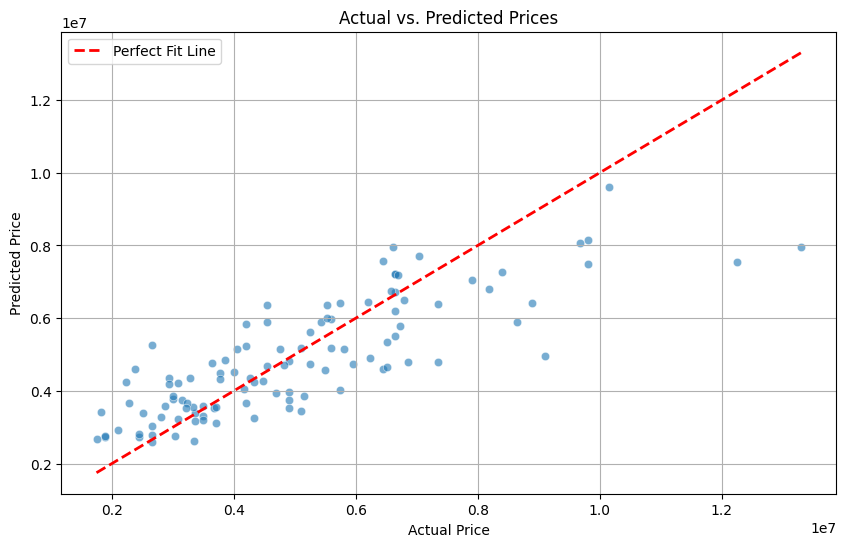

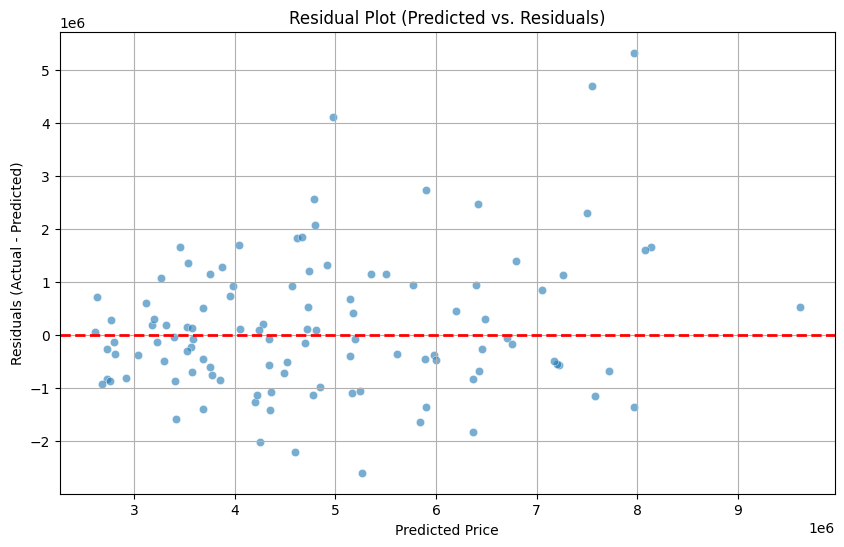


--- Plot Interpretation ---
The 'Actual vs. Predicted Prices' plot shows how well the predicted values align with the actual values. Points close to the red diagonal line indicate good predictions.
The 'Residual Plot' helps to check the assumptions of linear regression. Ideally, residuals should be randomly scattered around zero, indicating that the model captures the underlying relationship well and there are no obvious patterns in the errors.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
try:
    # Assuming the file is in the root of your Google Drive, the path will be '/content/drive/MyDrive/Housing.csv'
    df = pd.read_csv('/content/drive/MyDrive/Housing.csv')
except FileNotFoundError:
    print("Error: Housing.csv not found. Please ensure the file is in the correct directory.")
    exit()

# --- 1. Import and preprocess the dataset ---
print("--- Dataset Head ---")
print(df.head())
print("\n--- Dataset Info ---")
df.info()
print("\n--- Dataset Description ---")
print(df.describe())


# Identify columns with 'object' dtype, which usually indicates categorical data.
categorical_cols = df.select_dtypes(include='object').columns

# one category from each feature. This also handles binary categorical columns.
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\n--- Dataset Head after Preprocessing ---")
print(df.head())

# Define features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

# --- 2. Split data into train-test sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# --- 3. Fit a Linear Regression model using sklearn.linear_model ---
model = LinearRegression()
model.fit(X_train, y_train)

print("\n--- Model Training Complete ---")

# --- 4. Evaluate model using MAE, MSE, R² ---
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Often reported alongside MSE
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation ---")
print(f"Mean Absolute Error (MAE): \${mae:.2f}\$")
print(f"Mean Squared Error (MSE): \${mse:.2f}\$")
print(f"Root Mean Squared Error (RMSE): \${rmse:.2f}\$")
print(f"R-squared (\$$R^2\$$): \${r2:.4f}\$")



# Interpret coefficients
print("\n--- Model Coefficients ---")
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

print("\n--- Interpretation of Coefficients ---")
print("The coefficients represent the change in the 'price' for a one-unit increase in the corresponding feature, holding all other features constant.")
print("For example, a positive coefficient indicates that as the feature value increases, the price tends to increase.")
print("A negative coefficient indicates that as the feature value increases, the price tends to decrease.")

# Plotting the regression line (for a single feature for simplicity, e.g., 'area')
# This plot is illustrative. For multiple features, a simple 2D scatter plot with a single line isn't fully representative.


plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2, label='Perfect Fit Line')
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.legend()
plt.show()

# Residual Plot
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.title('Residual Plot (Predicted vs. Residuals)')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()

print("\n--- Plot Interpretation ---")
print("The 'Actual vs. Predicted Prices' plot shows how well the predicted values align with the actual values. Points close to the red diagonal line indicate good predictions.")
print("The 'Residual Plot' helps to check the assumptions of linear regression. Ideally, residuals should be randomly scattered around zero, indicating that the model captures the underlying relationship well and there are no obvious patterns in the errors.")